# EDA on weather data
- weather data is analyzed in this notebook
- getting an overview in trend and yearly seasonality

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('../data/preprocessed/Building_5.csv')
df.head()

,datetime,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kW,dhw_heating_kW,cooling_load_kW,solar_generation_W_kW,outdoor_temp,...,pred_12h_diffuse_solar_W_m2,pred_24h_diffuse_solar_W_m2,pred_6h_direct_solar_W_m2,pred_12h_direct_solar_W_m2,pred_24h_direct_solar_W_m2,holiday,workday,solar_generation_kW,electric_load_hp_kW,net_load_kW
0,2008-01-02 00:00:00,0,22.02,0.0,55.86,11.7,3.00,1.61,0.0,9.40,...,170.84,0.0,-0.00,5.32,0.0,True,False,0.0,0.170,14.870
1,2008-01-02 01:00:00,0,21.78,0.0,52.90,7.2,3.36,0.47,0.0,7.61,...,112.24,0.0,1.11,2.04,-0.0,True,False,0.0,0.029,10.589
2,2008-01-02 02:00:00,0,21.77,0.0,50.06,8.1,0.36,0.58,0.0,8.11,...,65.93,0.0,1.74,1.04,0.0,True,False,0.0,0.043,8.503
3,2008-01-02 03:00:00,0,21.81,0.0,47.95,12.4,0.12,1.19,0.0,8.36,...,38.59,-0.0,1.09,0.99,0.0,True,False,0.0,0.096,12.616
4,2008-01-02 04:00:00,0,21.77,0.0,46.91,8.6,0.00,0.59,0.0,8.78,...,15.92,0.0,1.78,0.84,0.0,True,False,0.0,0.053,8.653


In [8]:
# convert datetime to pd datetime format
df.datetime = pd.to_datetime(df.datetime)

In [9]:
# Extract additional features from timestamp column
df_weather = df.assign(
    timestamp = df['datetime'], 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)

In [10]:
df_weather.head()

,datetime,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kW,dhw_heating_kW,cooling_load_kW,solar_generation_W_kW,outdoor_temp,...,solar_generation_kW,electric_load_hp_kW,net_load_kW,timestamp,date,year,month,day,dayofyear,hour
0,2008-01-02 00:00:00,0,22.02,0.0,55.86,11.7,3.00,1.61,0.0,9.40,...,0.0,0.170,14.870,2008-01-02 00:00:00,2008-01-02,2008,1,2,2,0
1,2008-01-02 01:00:00,0,21.78,0.0,52.90,7.2,3.36,0.47,0.0,7.61,...,0.0,0.029,10.589,2008-01-02 01:00:00,2008-01-02,2008,1,2,2,1
2,2008-01-02 02:00:00,0,21.77,0.0,50.06,8.1,0.36,0.58,0.0,8.11,...,0.0,0.043,8.503,2008-01-02 02:00:00,2008-01-02,2008,1,2,2,2
3,2008-01-02 03:00:00,0,21.81,0.0,47.95,12.4,0.12,1.19,0.0,8.36,...,0.0,0.096,12.616,2008-01-02 03:00:00,2008-01-02,2008,1,2,2,3
4,2008-01-02 04:00:00,0,21.77,0.0,46.91,8.6,0.00,0.59,0.0,8.78,...,0.0,0.053,8.653,2008-01-02 04:00:00,2008-01-02,2008,1,2,2,4


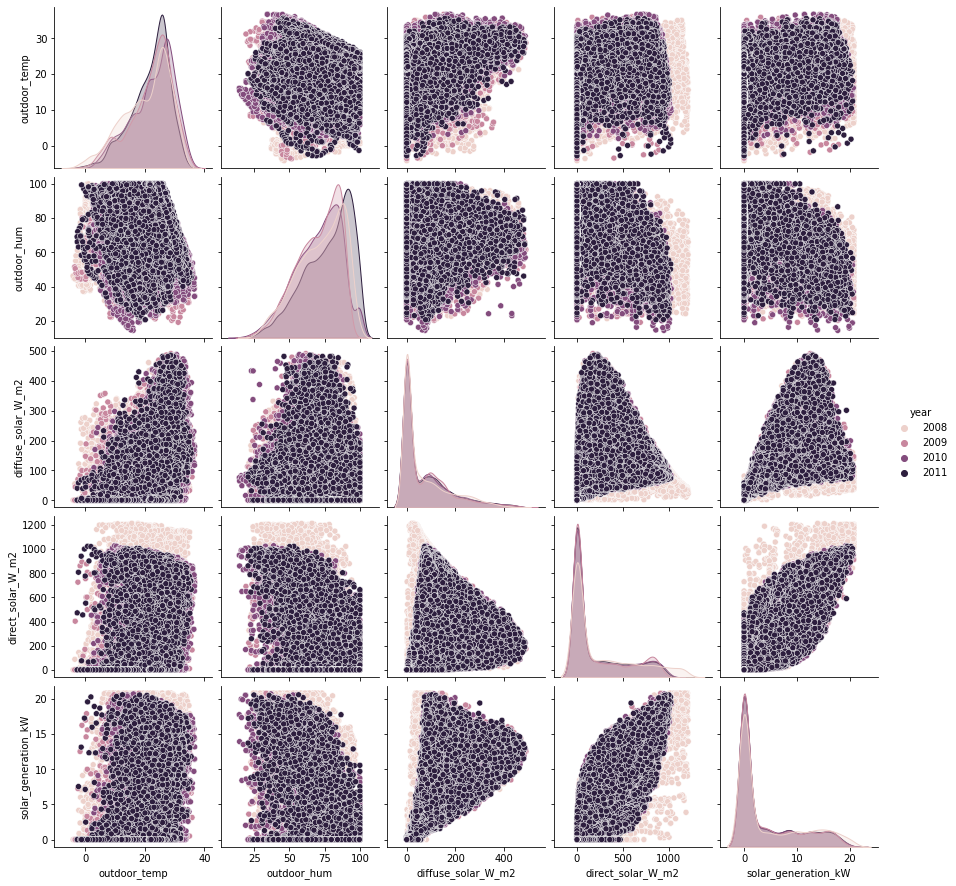

In [13]:
sns.pairplot(data = df_weather[['outdoor_temp',
       'outdoor_hum', 'diffuse_solar_W_m2', 'direct_solar_W_m2',
       'solar_generation_kW', 'year', ]], 
       hue='year'
       )

- direct solar radiation in 2008 (aka 2018) seems to be much stronger then in the other years! no logic explanation found so far 

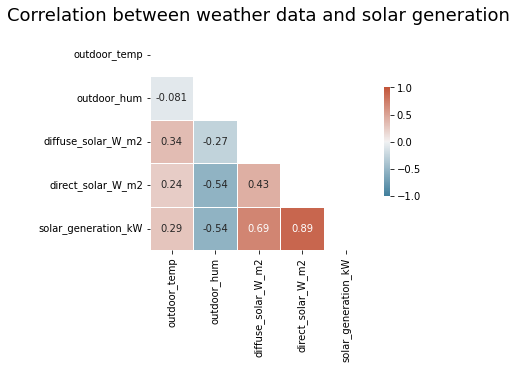

In [14]:
# correlation matrix for weather data + solar generation
corr_weather= df_weather[['outdoor_temp','outdoor_hum', 'diffuse_solar_W_m2', 'direct_solar_W_m2','solar_generation_kW']].corr()
mask = np.triu(np.ones_like(corr_weather, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(corr_weather, mask=mask, cmap=cmap, vmax=1, vmin=-1,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
heatmap.set_title('Correlation between weather data and solar generation', fontdict={'fontsize':18}, pad=12);
#sns.heatmap(corr_weather, vmin=-1, vmax=1, annot=True)

In [21]:
# plotting function
def plotting(feature):
    y = feature
    # plotting hourly temperature data over dayofyear, classified by year
    plt.figure(figsize=(20,5))
    sns.lineplot(data=df_weather,x='dayofyear',y=feature,hue='year',ci=None)
    plt.title(f'Hourly '+str(feature)+' for 4 years')

    #smoothing the outdoor temperature data with rolling mean (unif), with centered window, window size: 1 month
    # creating temperature data frame
    df_mean = df_weather[feature]
    rolling_mean = df_mean.rolling(30*24,center=True).mean()

    # plot of smoothed temperature data, classified by year
    plt.figure(figsize=(20,5))
    sns.lineplot(x=df_weather['dayofyear'],y=rolling_mean,hue=df_weather['year'],ci=None)
    plt.title(f'Mean '+str(feature)+' with moving average over 30 days')


    #smoothing the outdoor temperature data with rolling mean (unif), with centered window, window size: 1 month
    # creating temperature data frame
    df_mean = df_weather[feature]
    rolling_mean = df_mean.rolling(365*24,center=True).mean()

    # plot of smoothed temperature data, classified by year
    plt.figure(figsize=(20,5))
    sns.lineplot(x=df_weather['date'],y=rolling_mean,ci=None)
    plt.title(f'Mean '+str(feature)+' with moving average over 365 days (trend)')


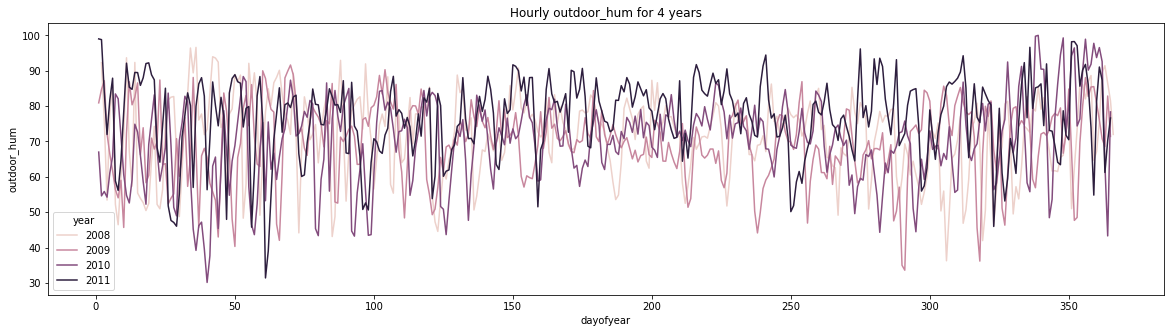

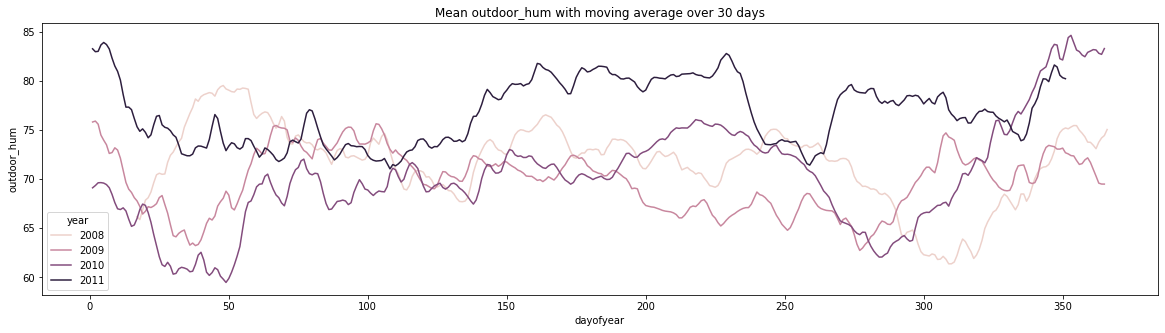

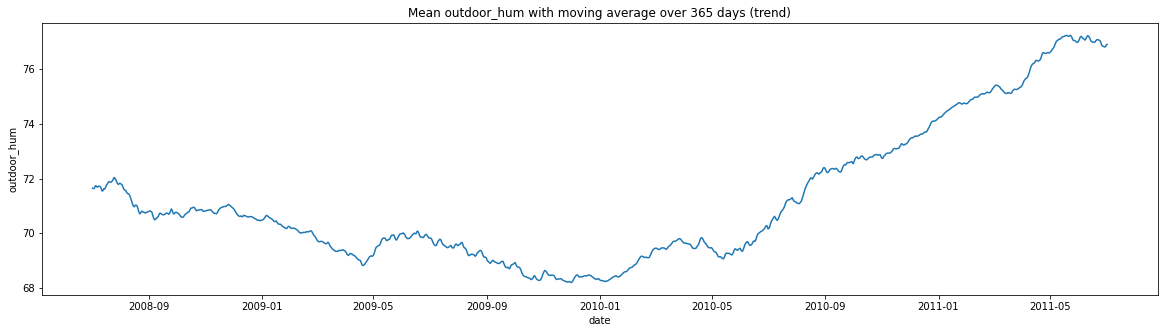

In [22]:
plotting('outdoor_hum')

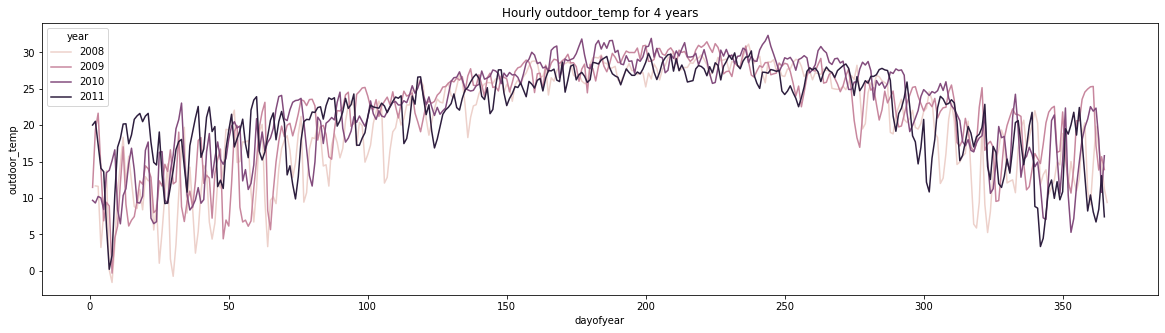

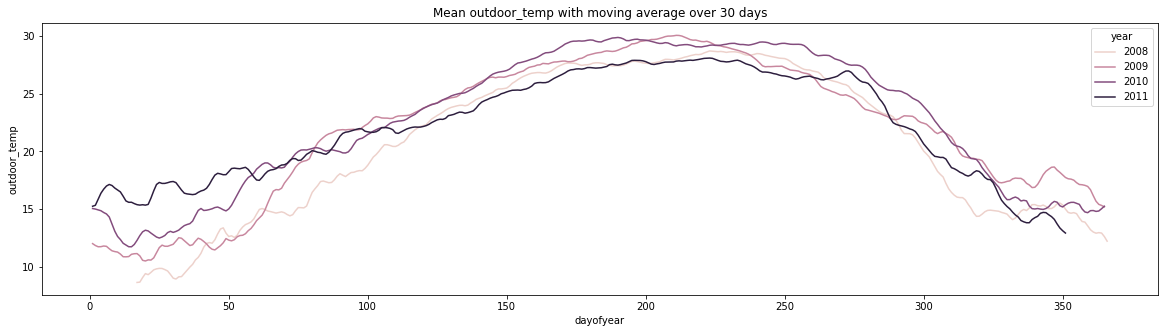

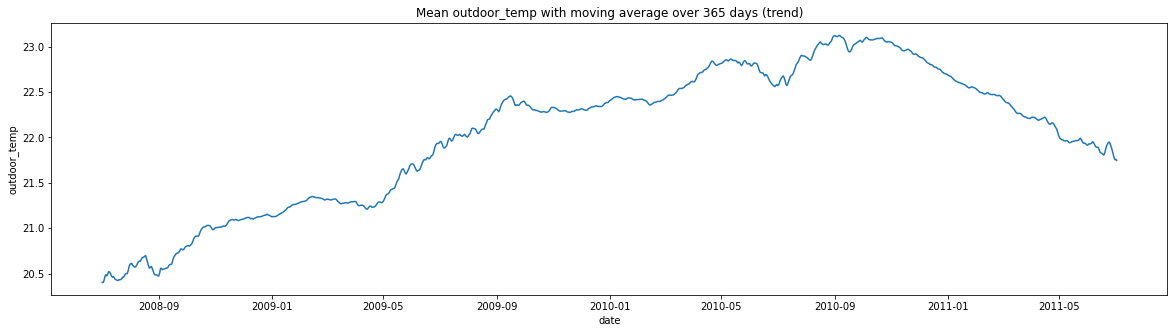

In [23]:
plotting('outdoor_temp')

- In the first 60 days of the year, bigger variance of mean temperature between years: maybe difficult to model precisely.
- 2011 (aka 2021) had the coldest summer and the mildest winter.
- winters are getting warmer from 2008 - 2011 (aka 2018-2021)

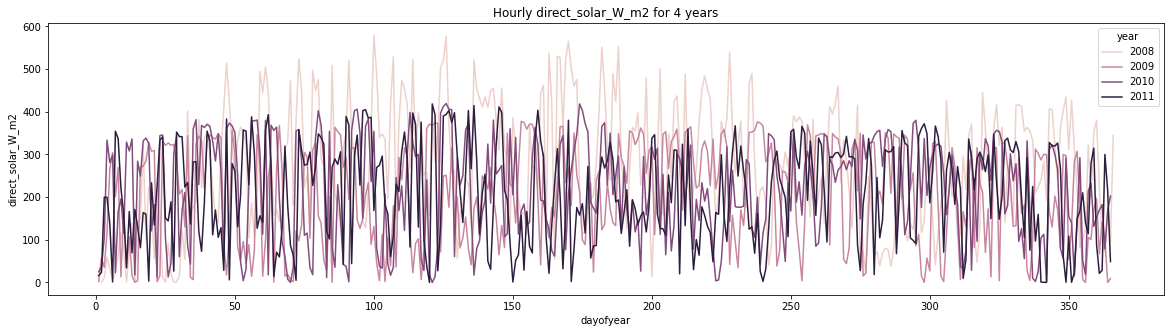

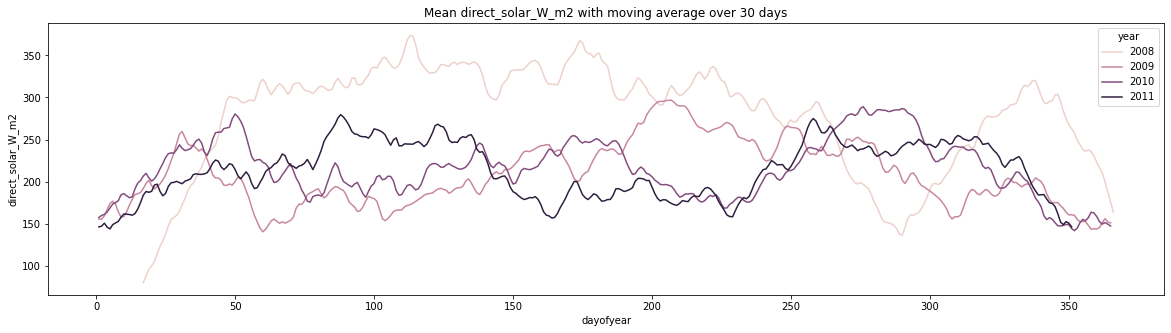

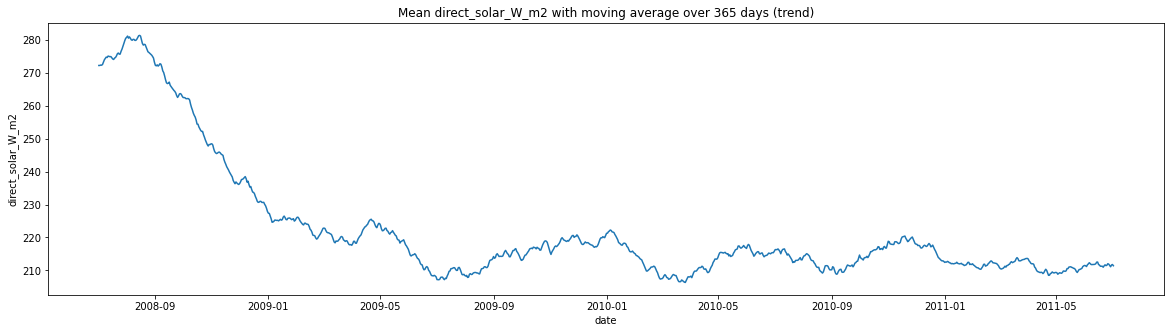

In [24]:
plotting('direct_solar_W_m2')

- direct solar radiation in 2008 is very strong compared to the following years
- convert units from W/m2 to kWh/m2(a): 1 W/m2 * 8760h / 1000 = [kWh/m2(a)]

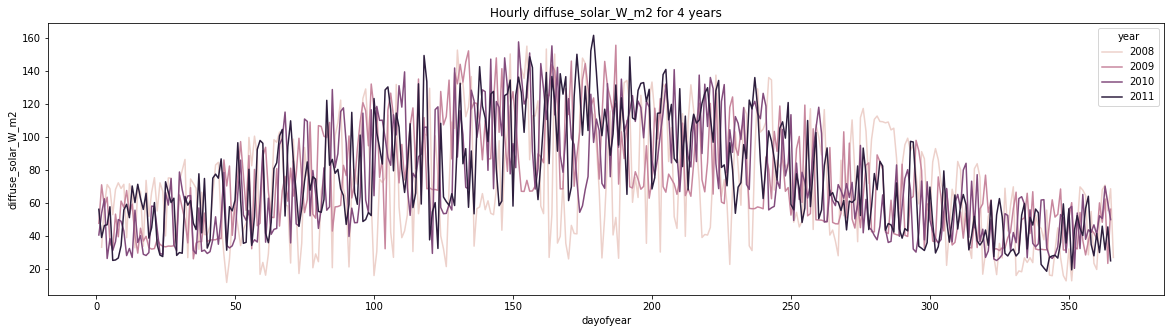

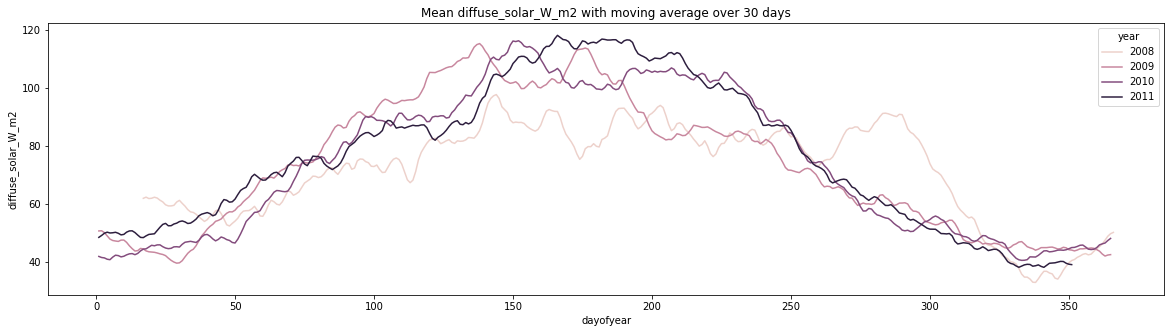

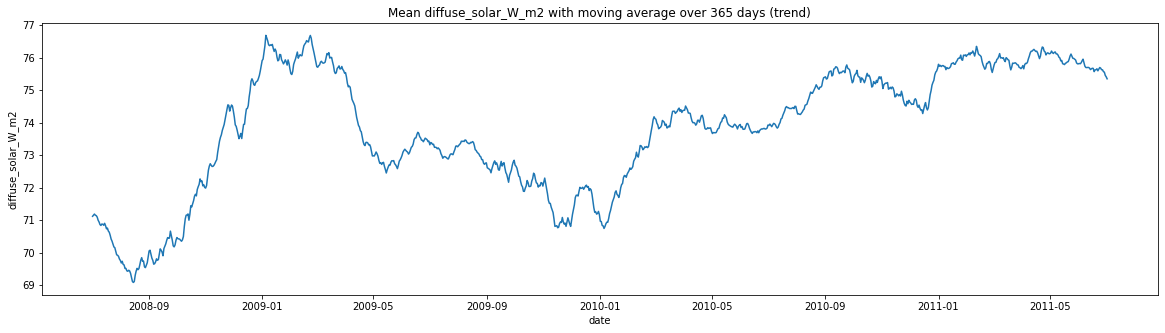

In [25]:
plotting('diffuse_solar_W_m2')

Text(0.5, 1.0, 'Trend of solar generation (orange) and direct solar radiation (blue)')

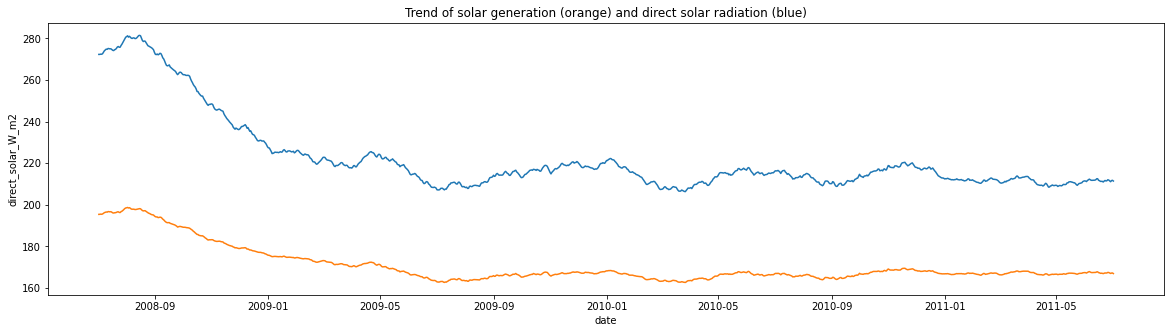

In [32]:
# plot trend of direct solar radiation and solar generation

#smoothing the outdoor temperature data with rolling mean (unif), with centered window, window size: 1 month
# creating temperature data frame
df_mean = df_weather['direct_solar_W_m2']
rolling_mean = df_mean.rolling(365*24,center=True).mean()
df_mean2 = df_weather['solar_generation_W_kW']
rolling_mean2 = df_mean2.rolling(365*24,center=True).mean()
#rolling_mean2['feature']= 'solar_generation_W_kW'
# plot of smoothed temperature data, classified by year
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=df_weather['date'],y=rolling_mean,ci=None)
sns.lineplot(x=df_weather['date'],y=rolling_mean2,ci=None)
ax.set_title('Trend of solar generation (orange) and direct solar radiation (blue)')